In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
df = pd.read_csv("D:/122B1F034/Dataset/titanic.csv")
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [13]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].median() , inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\RUSHIKESH HIRAY\AppData\Local\Temp\ipykernel_18104\2456602167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median() , inplace=True)
C:\Users\RUSHIKESH HIRAY\AppData\Local\Temp\ipykernel_18104\2456602167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [15]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

In [16]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [17]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le_sex = LabelEncoder()
le_emb = LabelEncoder()

In [20]:
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_emb.fit_transform(df['Embarked'])

In [21]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5089285714285714, 0.9, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.14285714285714285, 0.5, 'x[2] <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 27.5\ngini = 0.061\nsamples = 128\nvalue = [4, 124]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.12\nsamples = 47\nvalue = [3.0, 44.0]'),
 Text(0.25, 0.1, 'gini = 0.024\nsamples = 81\nvalue = [1, 80]'),
 Text(0.42857142857142855, 0.5, 'x[5] <= 23.35\ngini = 0.5\nsamples = 115\nvalue = [59.0, 56.0]'),
 Text(0.35714285714285715, 0.3, 'x[6] <= 1.5\ngini = 0.486\nsamples = 94\nvalue = [39, 55]'),
 Text(0.32142857142857145, 0.1, 'gin

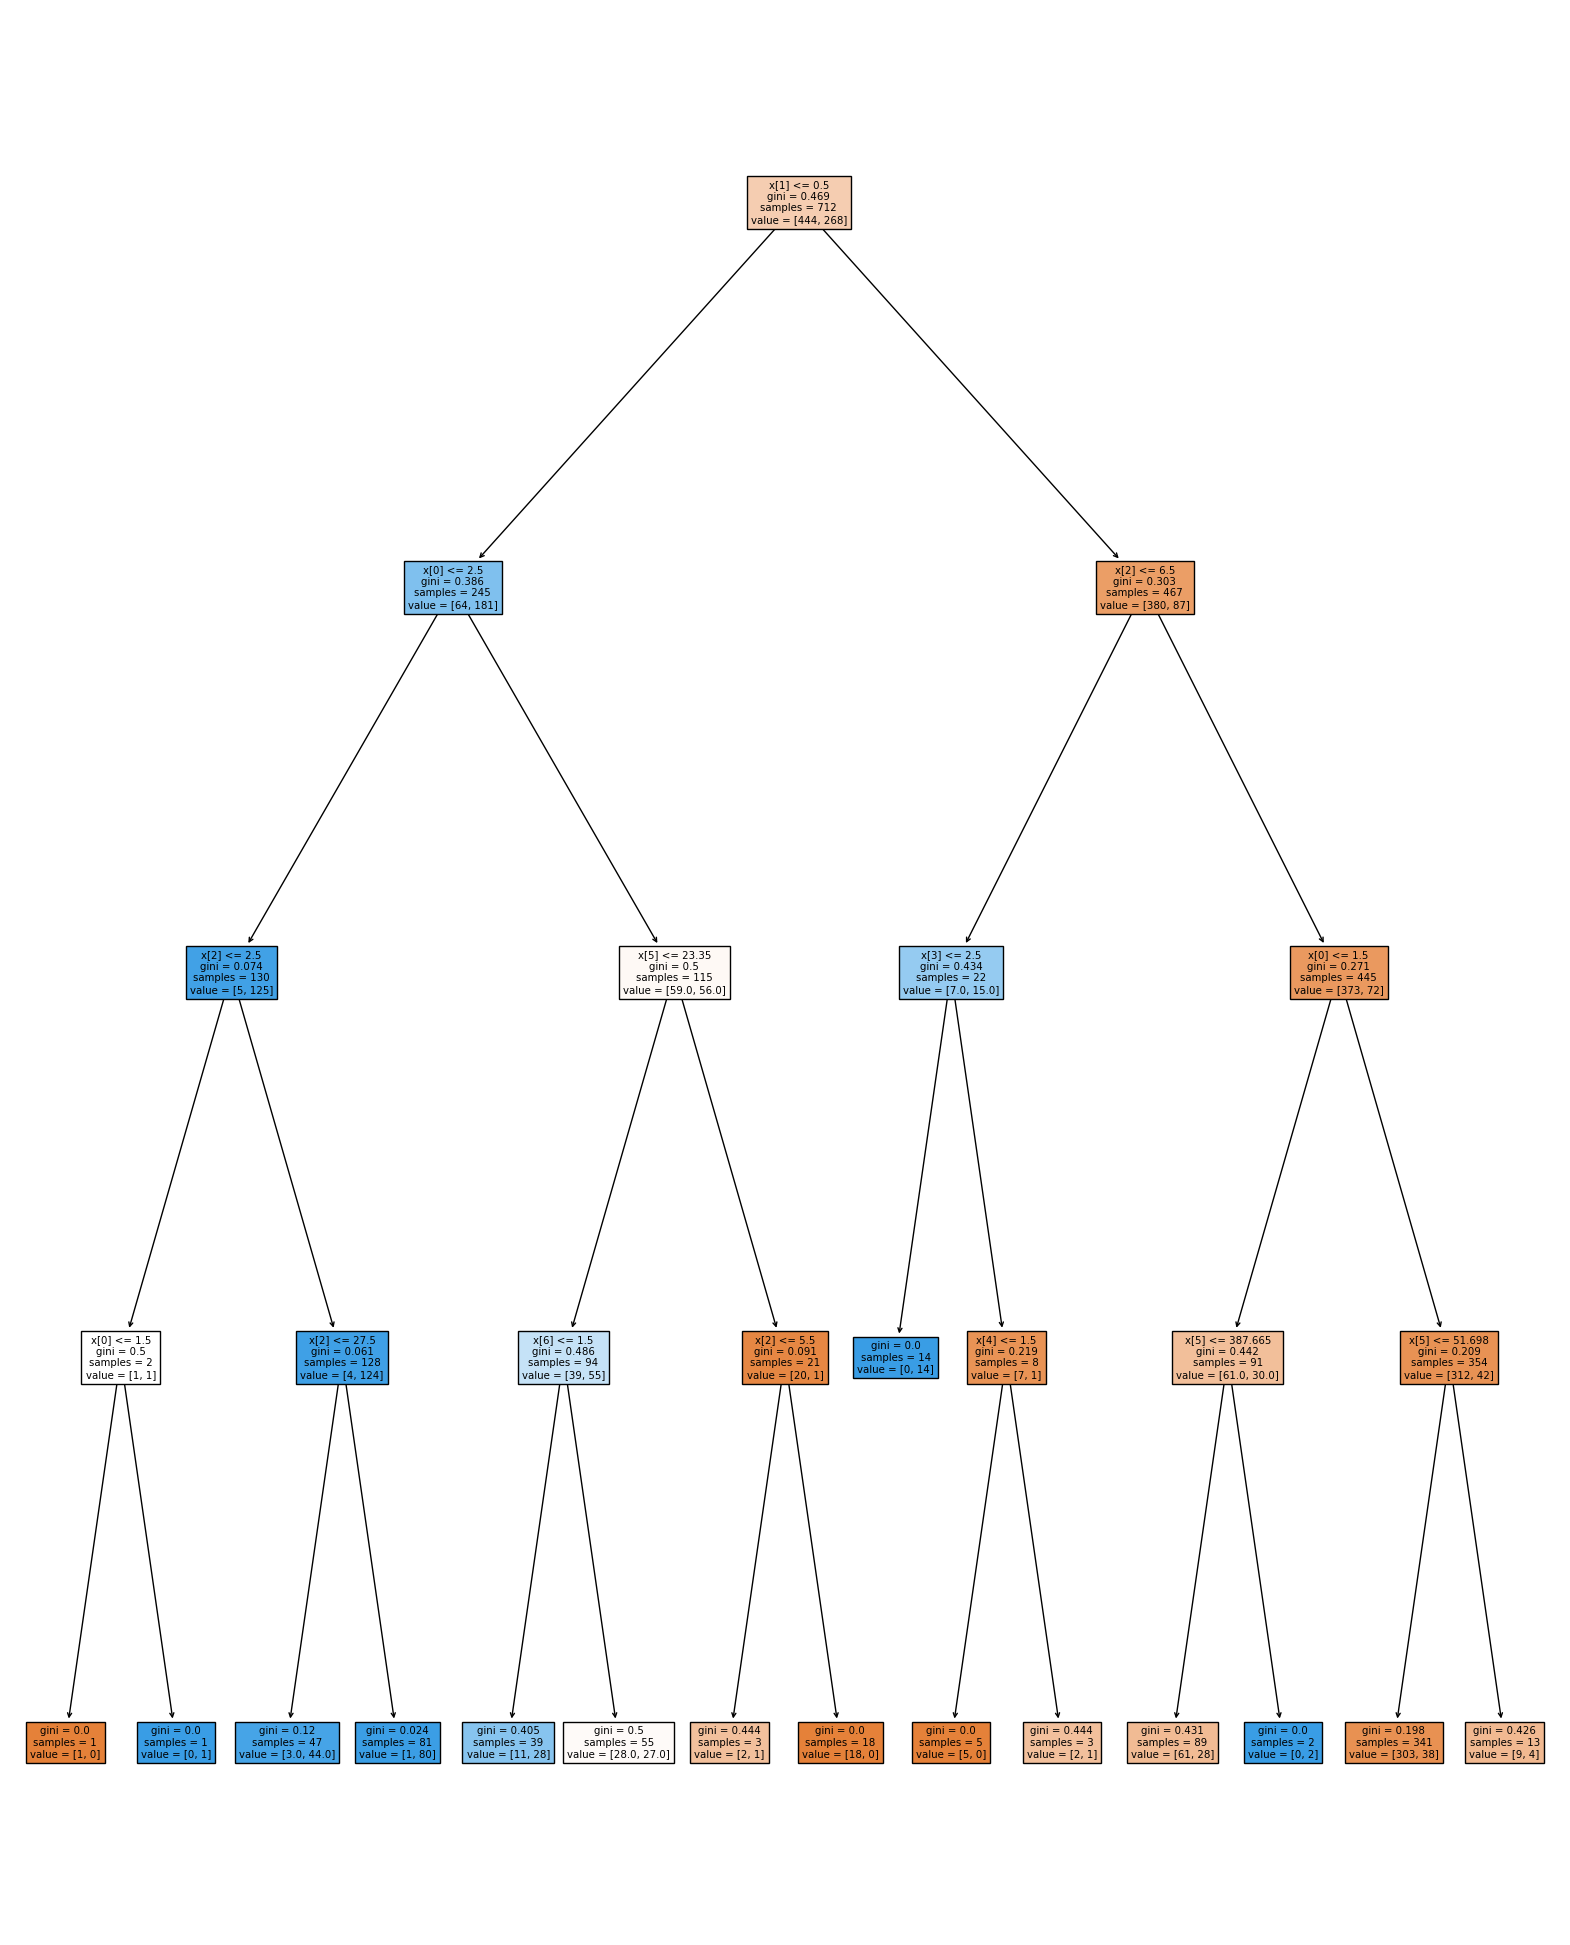

In [24]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(model,filled=True)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [27]:
score = accuracy_score(y_pred,y_test)
score

0.7988826815642458

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       123
           1       0.64      0.84      0.72        56

    accuracy                           0.80       179
   macro avg       0.77      0.81      0.78       179
weighted avg       0.83      0.80      0.80       179



# Prepruning

In [29]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [30]:
from sklearn.model_selection import GridSearchCV 

In [31]:
treemodal = DecisionTreeClassifier()
cv = GridSearchCV(treemodal,param_grid=parameter,cv=5,scoring='accuracy')

In [32]:
cv.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [33]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [35]:
best_model = cv.best_estimator_

In [36]:
y_pred = best_model.predict(X_test)

In [40]:
accuracy_score(y_pred,y_test)

0.7374301675977654

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       128
           1       0.53      0.76      0.62        51

    accuracy                           0.74       179
   macro avg       0.71      0.75      0.71       179
weighted avg       0.78      0.74      0.75       179



[Text(0.5, 0.9166666666666666, 'x[0] <= 2.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(0.18604651162790697, 0.75, 'x[2] <= 15.5\nentropy = 0.993\nsamples = 314\nvalue = [142, 172]'),
 Text(0.046511627906976744, 0.5833333333333334, 'x[5] <= 135.775\nentropy = 0.276\nsamples = 21\nvalue = [1, 20]'),
 Text(0.023255813953488372, 0.4166666666666667, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.06976744186046512, 0.4166666666666667, 'x[2] <= 1.46\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.046511627906976744, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09302325581395349, 0.25, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06976744186046512, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11627906976744186, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.32558139534883723, 0.5833333333333334, 'x[3] <= 0.5\nentropy = 0.999\nsamples = 293\nvalue = [141.0, 152

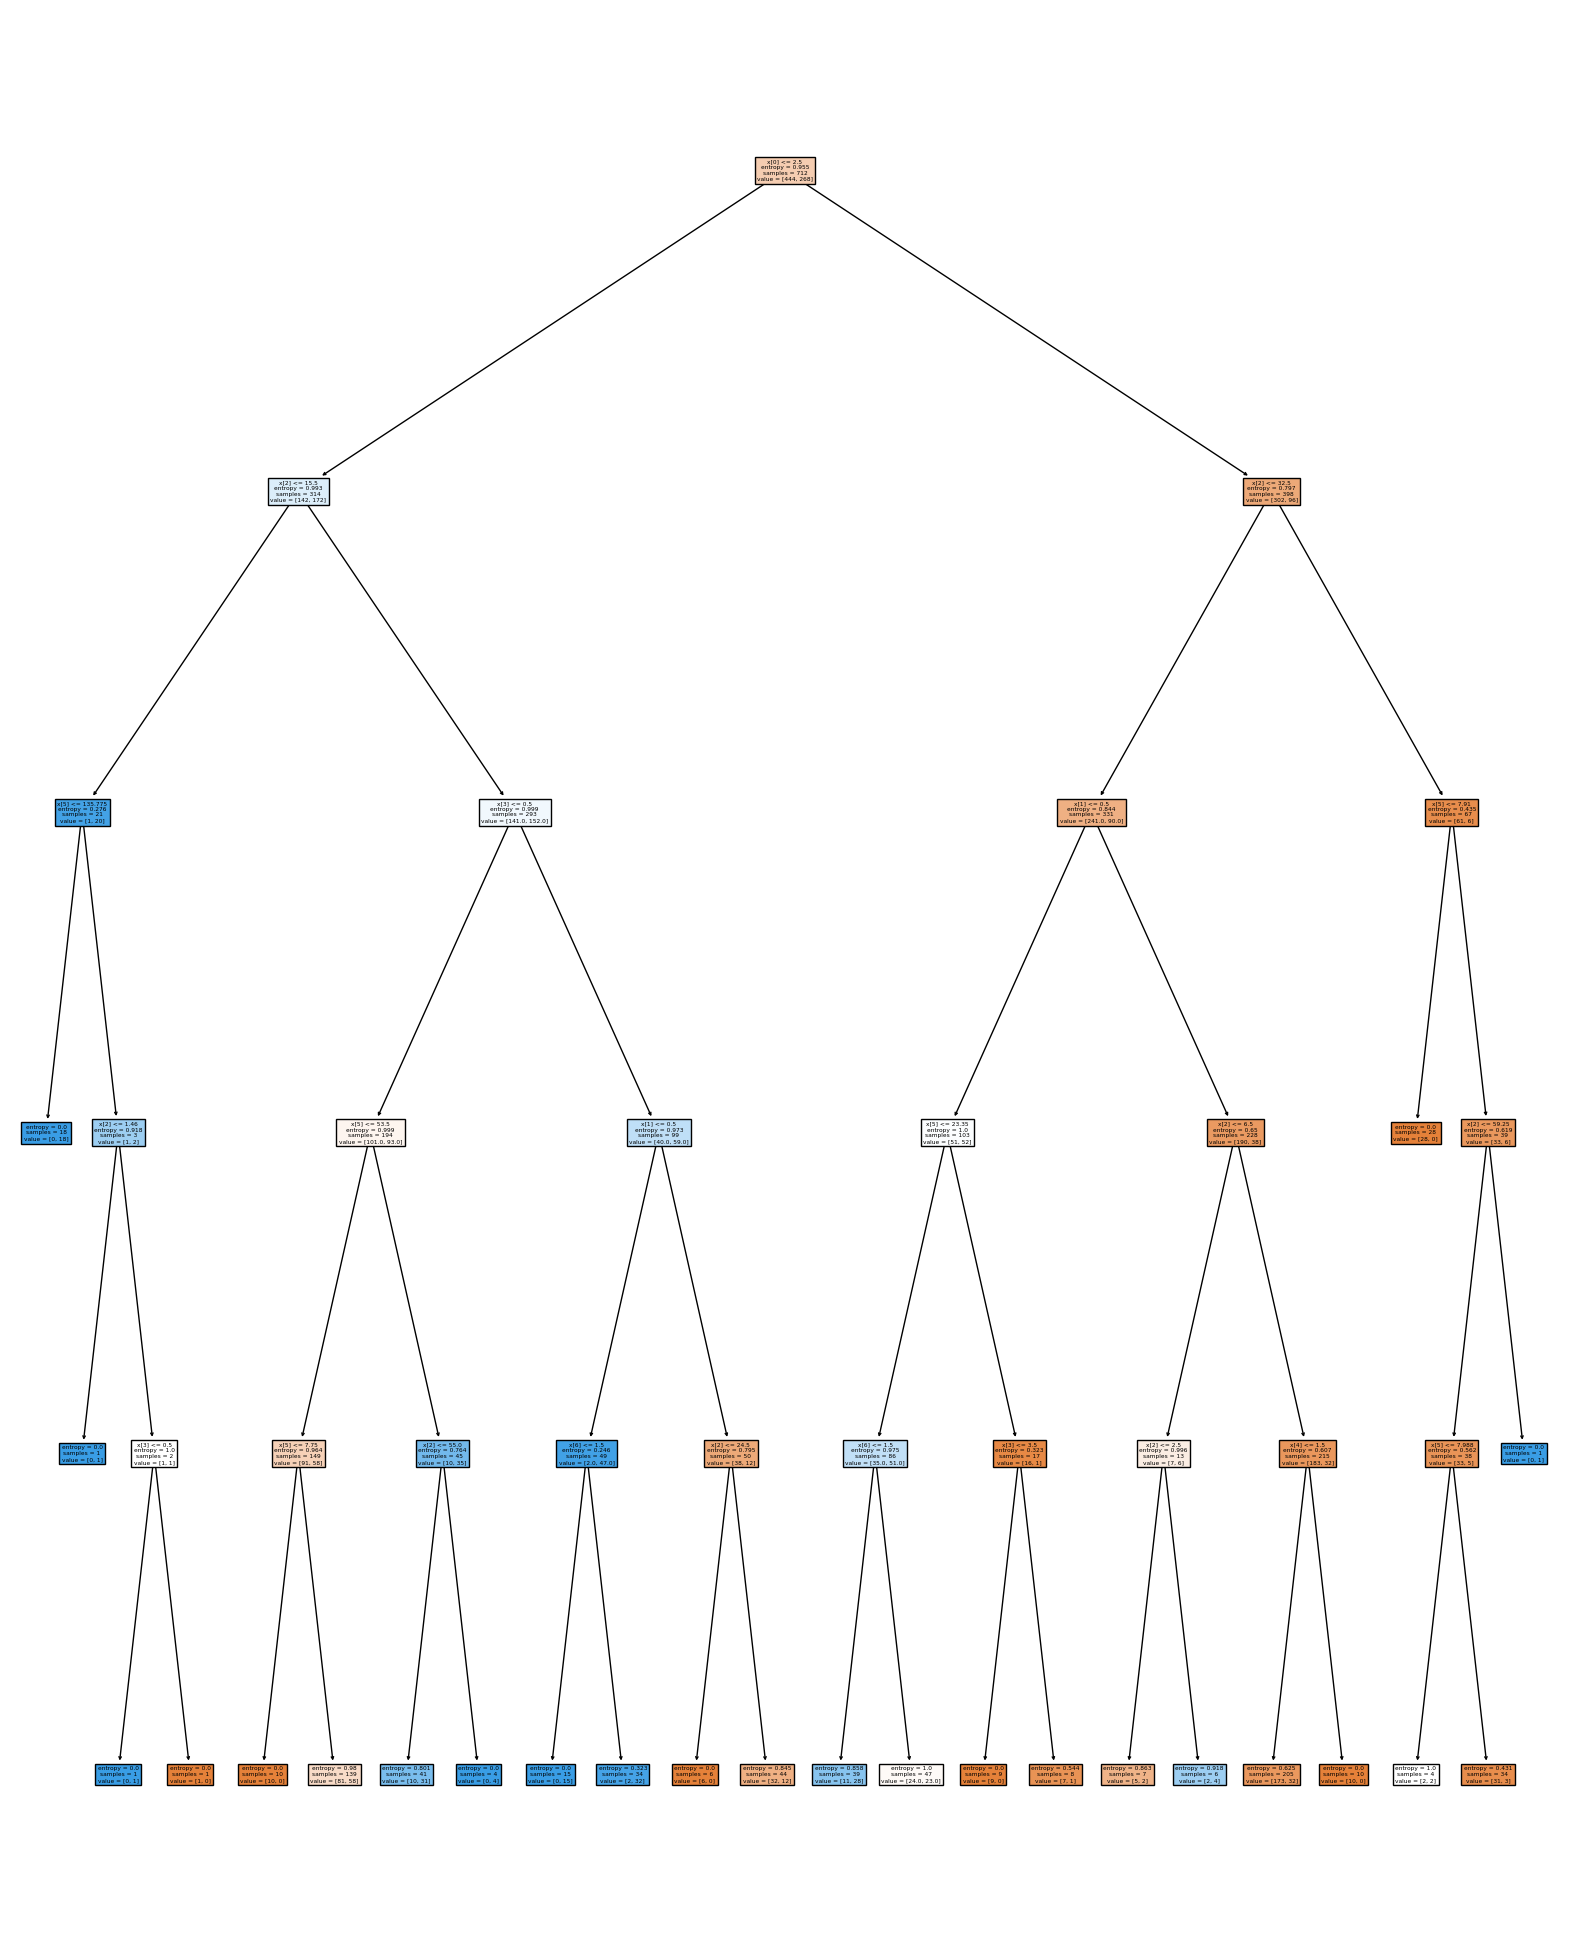

In [43]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(best_model,filled=True)

# Postpruning

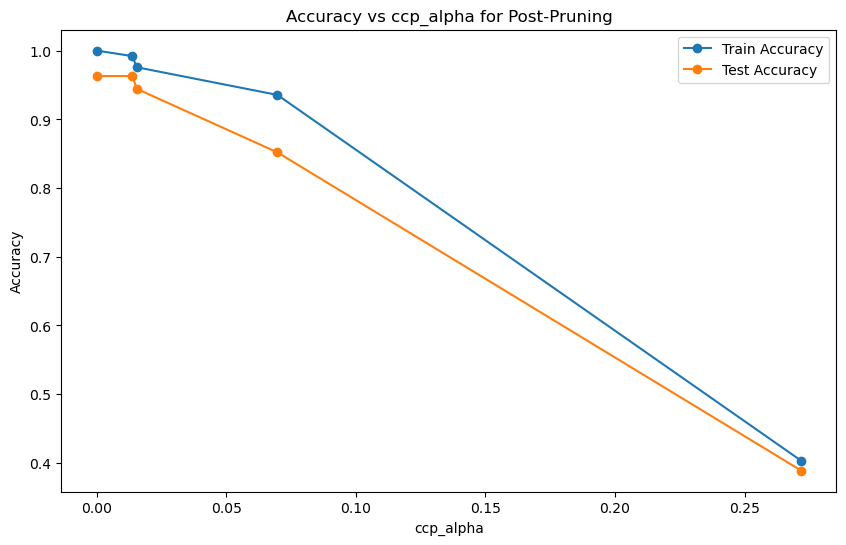

Optimal ccp_alpha: 0.0
Post-pruning Accuracy: 0.9629629629629629


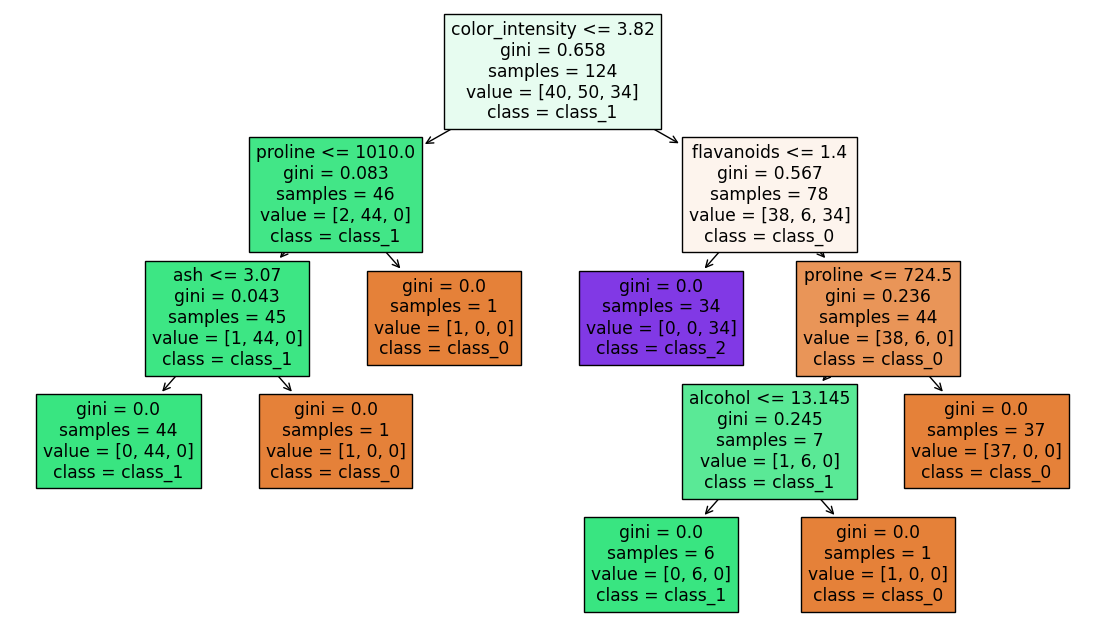

In [44]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit initial tree to find pruning path
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train trees with different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)

# Evaluate accuracy for each alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test, y_test) for clf in clfs]

# Plot accuracy vs alpha
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs ccp_alpha for Post-Pruning')
plt.show()

# Pick a reasonable alpha (e.g., where test accuracy is highest)
optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print("Optimal ccp_alpha:", optimal_alpha)

# Final post-pruned tree
clf_postprune = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
clf_postprune.fit(X_train, y_train)

# Predict and accuracy
y_pred = clf_postprune.predict(X_test)
print("Post-pruning Accuracy:", accuracy_score(y_test, y_pred))

# Visualize pruned tree
plt.figure(figsize=(14,8))
plot_tree(clf_postprune, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()